In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from OceanPSC.GanGeneration import Generation,print_classes
import time
import OceanPSC.classification as c

In [2]:
print_classes()

0 abp
1 active_margin
2 cr
3 csh
4 land_csh
5 mor
6 passive_margin
7 rs
8 s_abp
9 s_rs
10 vrs


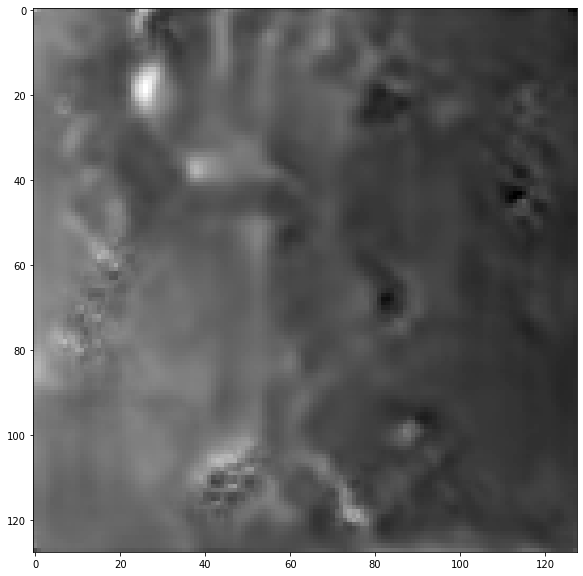

In [6]:
gen=Generation(inter_d=1)
img=gen.generate_one_sample(7)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')

In [28]:
plt.imsave('dems/art11.png',img,cmap='gray')

In [2]:
import cv2
from scipy.ndimage.filters import gaussian_filter

In [15]:
classes=np.array([[7,7,7,10,7,7,7,7,7],
                  [7,7,10,10,7,7,7,9,7],
                  [7,7,7,7,7,7,7,7,7],
                  [10,10,9,7,7,7,7,7,7],
                  [7,7,10,10,0,0,7,7,7],
                  [7,7,7,7,0,0,7,10,7],
                  [7,7,0,0,0,0,7,7,7],
                  [7,7,7,0,8,0,7,7,7],
                  [7,7,0,0,0,0,7,7,7]])

#classes=7*np.ones_like(classes)

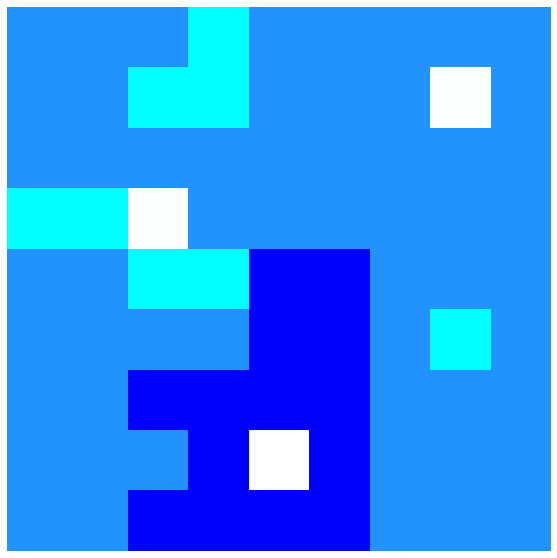

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(classes,cmap=c.samples_color_map)
plt.axis('off')
plt.show()

In [19]:
gen=Generation(inter_d=2)

6.973345518112183


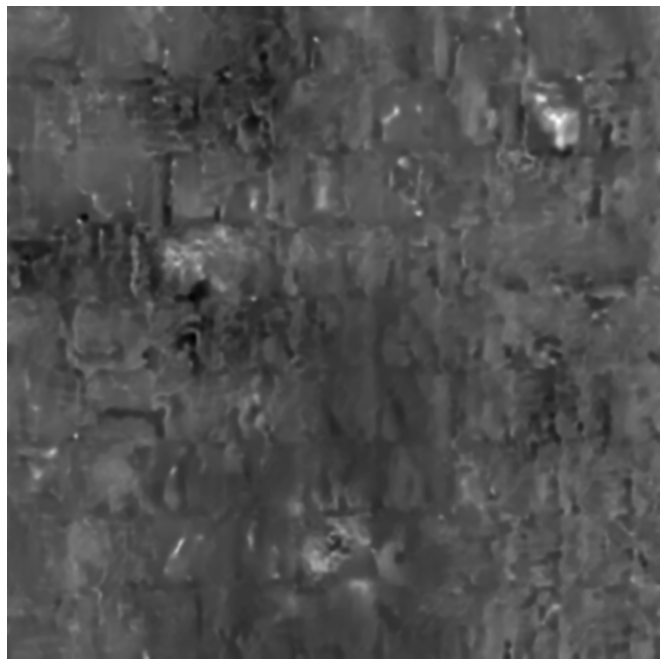

In [20]:

gen.num_candidates=125
t=time.time()
carte=gen.generate_tiled_map(classes)
print(time.time()-t)

carte = cv2.morphologyEx(np.float32(carte), cv2.MORPH_CLOSE, np.ones((5, 5)))
carte = cv2.medianBlur(carte, 5)

carte=gaussian_filter(carte,1.5)

plt.figure(figsize=(12,12))
plt.imshow(carte,cmap='gray')
plt.axis('off')
plt.show()

In [21]:

plt.imsave('dems/art.png',carte,cmap='gray')